<a href="https://colab.research.google.com/github/Arkaprabha1012/pythonopencv/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/l0auzqw27g4tph0/augmentedbonesupression.zip?dl=0

--2021-02-05 09:37:12--  https://www.dropbox.com/s/l0auzqw27g4tph0/augmentedbonesupression.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l0auzqw27g4tph0/augmentedbonesupression.zip [following]
--2021-02-05 09:37:12--  https://www.dropbox.com/s/raw/l0auzqw27g4tph0/augmentedbonesupression.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2021-02-05 09:37:13 ERROR 404: Not Found.



In [ ]:
!unzip augmentedbonesupression.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: augmented/source/2_195.png  
  inflating: augmented/source/0_168.png  
  inflating: augmented/source/2_197.png  
  inflating: augmented/source/1_181.png  
  inflating: augmented/source/1_182.png  
  inflating: augmented/source/0_173.png  
  inflating: augmented/source/2_201.png  
  inflating: augmented/source/0_174.png  
  inflating: augmented/source/1_185.png  
  inflating: augmented/source/3_222.png  
  inflating: augmented/source/3_223.png  
  inflating: augmented/source/1_187.png  
  inflating: augmented/source/1_188.png  
  inflating: augmented/source/2_206.png  
  inflating: augmented/source/0_181.png  
  inflating: augmented/source/3_228.png  
  inflating: augmented/source/3_230.png  
  inflating: augmented/source/0_185.png  
  inflating: augmented/source/1_197.png  
  inflating: augmented/source/3_236.png  
  inflating: augmented/source/3_238.png  
  inflating: augmented/source/2_219.png  
  inflating: augmented/so

100%|██████████| 4080/4080 [00:41<00:00, 98.13it/s] 


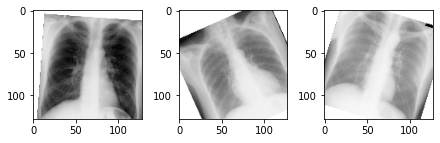

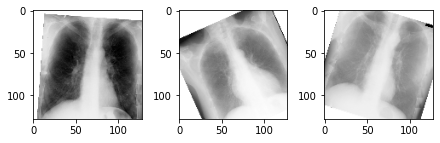

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 8)         5

'\nplt.figure(figsize=(40, 4))\nfor i in range(10):\n    # display original\n    ax = plt.subplot(3, 20, i + 1)\n    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")\n    \n    # display reconstructed (after noise removed) image\n    ax = plt.subplot(3, 20, 40 +i+ 1)\n    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")\nplt.show()'

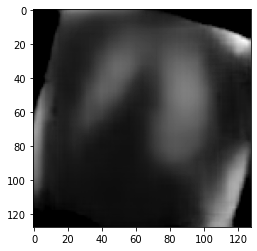

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array

# x is noisy data and y is clean data
SIZE = 128

from tqdm import tqdm
noisy_data=[]
path1 = 'augmented/source'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data.append(img_to_array(img))
    

clean_data=[]
path2 = 'augmented/target'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255.


#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()



model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)


print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

'''
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
plt.show()'''